**Bu proje, kedi ve köpek görüntülerini ayırt etmek için güçlü bir Konvolüsyonel Sinir Ağı (CNN) modelinin nasıl oluşturulacağını, eğitileceğini ve değerlendirileceğini göstermektedir.**![](http://popsci.com.tr/wp-content/uploads/2020/09/iStock-1173784613.jpg) kaynak: https://popsci.com.tr/kediler-ve-kopekler-dunyayi-nasil-goruyor/

In [1]:
# Öncelikle Gerekli olacak kütüphaneleri yüklemekle işe başlıyorum

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2025-09-26 17:55:12.589430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758909312.806707      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758909312.869224      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [23]:
# Datasetimi çağırıyorum

dataset_path = "/kaggle/input/asirra-cats-vs-dogs-object-detection-dataset/Asirra: cat vs dogs"

In [24]:
# Verilerimi kontrol ediyorum

image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
print(image_files[:5])  # İlk 5 dosyayı göster

['dog.375.jpg', 'cat.1.jpg', 'cat.3921.jpg', 'cat.3949.jpg', 'dog.83.jpg']


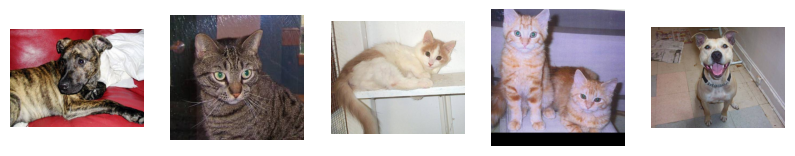

In [25]:
# veri dosyamdaki dosyaları görselleştiriyorum

plt.figure(figsize=(10, 10))
for i in range(5):  # İlk 5 örneği göstereceğiz
    img_path = os.path.join(dataset_path, image_files[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')  # Eksenleri gizle
plt.show()

In [45]:
# Veri setimdeki Görüntü ve etiketleri hazırlıyorum

images = []
labels = []

for img_file in image_files:
    label = 0 if 'cat' in img_file else 1  # 0=cat, 1=dog
    img_path = os.path.join(dataset_path, img_file)
    
    # Resmi yükle ve boyutlandır
    img = load_img(img_path, target_size=(128,128))
    img = img_to_array(img) / 255.0  # normalize
    images.append(img)
    labels.append(label)

# NumPy array'e çevir
images = np.array(images)
labels = np.array(labels)

print("Görüntüler shape:", images.shape)
print("Etiketler shape:", labels.shape)

Görüntüler shape: (1100, 128, 128, 3)
Etiketler shape: (1100,)


In [46]:
# Verisetimi eğitim ve test olarak bölüyorum(genel kabul gören eğitim%80 ve test %20 olarak böldüm)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)
print("Eğitim verisi:", X_train.shape, "Test verisi:", X_test.shape)

Eğitim verisi: (880, 128, 128, 3) Test verisi: (220, 128, 128, 3)


In [47]:
#  CNN modeli oluşturuyorum(önceki denememe göre daha fazla katman ve filtre ekledim)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Modelimi derliyorum

optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,750,145 (10.49 MB)

 Trainable params: 2,749,185 (10.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [51]:
#  modelimi eğitiyorum


history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9822 - loss: 0.0448 - val_accuracy: 0.6648 - val_loss: 1.9770
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9815 - loss: 0.0425 - val_accuracy: 0.6250 - val_loss: 1.4402
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9828 - loss: 0.0466 - val_accuracy: 0.6818 - val_loss: 1.5370
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9831 - loss: 0.0553 - val_accuracy: 0.7045 - val_loss: 1.2604
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9928 - loss: 0.0326 - val_accuracy: 0.7273 - val_loss: 1.3052
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9785 - loss: 0.0412 - val_accuracy: 0.6591 - val_loss: 1.6258
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9861 - loss: 0.0365 - val_accuracy: 0.6818 - val_loss: 1.8239
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9952 - loss: 0.0241 - val_accuracy: 0.6818 - v

In [52]:
# Modelimi test ediyorum

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7214 - loss: 1.4976
Test accuracy: 0.7045454382896423


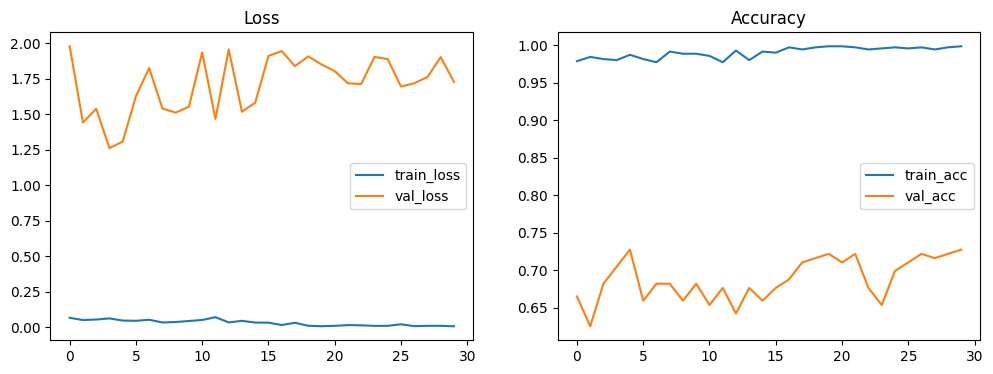

In [53]:
#  sonuçlarımı görselleştiriyorum

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

**farklı değerlendirmeler ekliyorum**

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Model ile test tahminleri

y_pred_probs = model.predict(X_test)   # olasılıklar
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()  # sınıf etiketleri
y_true = y_test.flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


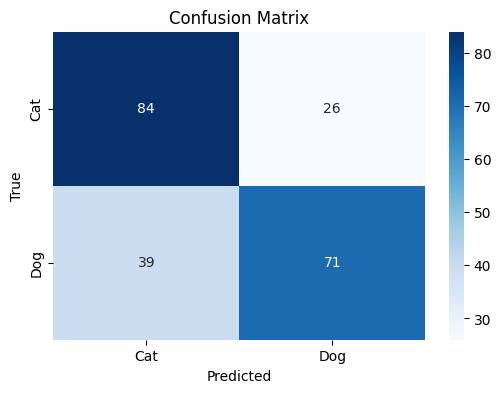

In [58]:
# Confusion Matrix oluşturdum (Karışıklık Matrisi)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cat","Dog"],
            yticklabels=["Cat","Dog"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [59]:
# Precision, Recall, F1 Skorları
print(classification_report(y_true, y_pred, target_names=["Cat","Dog"]))

              precision    recall  f1-score   support

         Cat       0.68      0.76      0.72       110
         Dog       0.73      0.65      0.69       110

    accuracy                           0.70       220
   macro avg       0.71      0.70      0.70       220
weighted avg       0.71      0.70      0.70       220



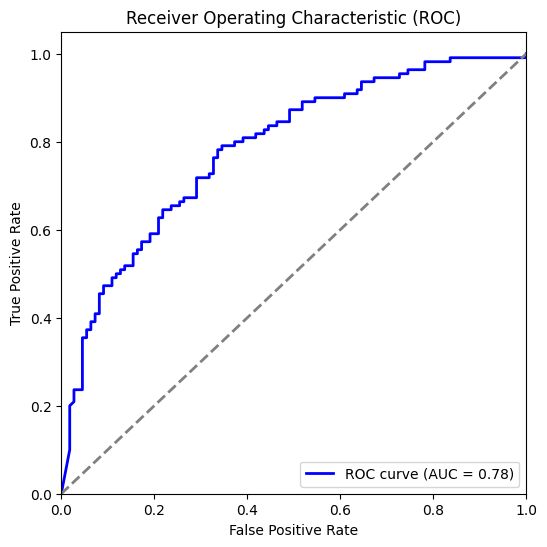

ROC AUC Skoru: 0.7844214876033058


In [64]:
# ROC eğrisi çizdirdim

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], color="gray", lw=2, linestyle="--")  # random tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Skoru:", roc_auc)

Sonuç: Bu proje, bir Konvolüsyonel Sinir Ağı (CNN) modeli kullanarak kedi ve köpek görüntülerini sınıflandırmayı amaçlamıştır. Proje, modelin temel öğrenme kabiliyetini gösterirken, nihai performansı hakkında bilgiler sunmakatadır. 
Çalışmada, eğitim sürecinde model, %98.59'luk bir eğitim doğruluğu ve %88.00'lık bir doğrulama (validation) doğruluğu elde etmiştir. Bu yüksek skorlar, modelin eğitim verilerindeki kalıpları başarıyla öğrendiğini gösteriyor. Ancak, modelin daha önce hiç görmediği verilere karşı sergilediği gerçek performans olan Test Doğruluğu ise %70.45 olarak ölçülmüştür. 
Eğitim ve test doğruluğu arasındaki bu fark, modelin eğitim verilerine aşırı uyum (overfitting) eğilimi gösterdiğine işaret edebilir. Bu proje, bir başlangıç çalışması olduğundan geliştirmek için yapılacaklar düşünülmektedir.